In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Rayleigh model for denitrification
# ds/df = (ds/df)[0] +eps*ln(f)
# dp/df = (ds/df)[0] -eps*(f*ln(f))/(1-f)
# dpi/df = ds/df + eps

In [3]:
# Initial conditions
ds0 = 5
f = np.arange(0,1,0.05)
eps = -5

In [1]:
# Model function
def rayleigh(f,ds,eps):
    dsdf = ds +eps*np.log(f)
    dpdf = ds -eps*(f*np.log(f))/(1-f)
    dpidf = dsdf + eps
    out = np.array([dsdf,dpdf,dpidf])
    return out

def tendency(f,ds,eps):
    dsdf = eps/f
    dpdf = -eps*(np.log(f)-f+1)/((f-1)**2)
    dpidf = eps/f
    out = np.array([dsdf])
    return out

# Function to calculate P[n+1]
def timestep(S,ds,P,dp,Pi,dpi,df):
    S2 = S + ds
    P2 = P + dp
    Pi2 = Pi + dpi
    out = np.array([S2,P2,Pi2])
    return out


/tmp/ipykernel_155/3333791791.py:3: RuntimeWarning: divide by zero encountered in log
  dsdf = ds +eps*np.log(f)
/tmp/ipykernel_155/3333791791.py:4: RuntimeWarning: divide by zero encountered in log
  dpdf = ds -eps*(f*np.log(f))/(1-f)
/tmp/ipykernel_155/3333791791.py:4: RuntimeWarning: invalid value encountered in multiply
  dpdf = ds -eps*(f*np.log(f))/(1-f)


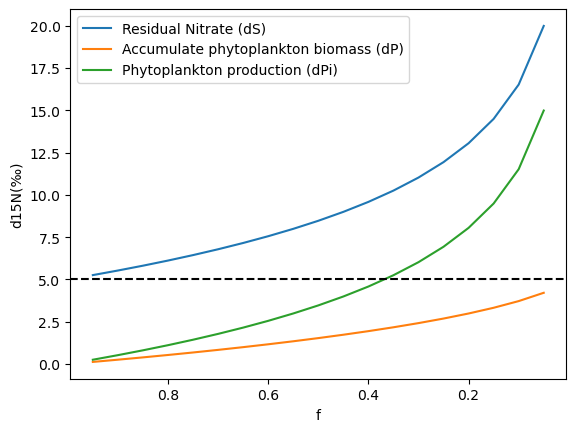

In [5]:
out = rayleigh(f,ds0,eps)
plt.plot(f,out[0],label='Residual Nitrate (dS)')
plt.plot(f,out[1],label='Accumulate phytoplankton biomass (dP)')
plt.plot(f,out[2],label='Phytoplankton production (dPi)')
plt.axhline(y = ds0, color = 'black', linestyle = '--')
plt.gca().invert_xaxis()
plt.legend()
plt.ylabel('d15N(‰)')
plt.xlabel('f')
plt.show()


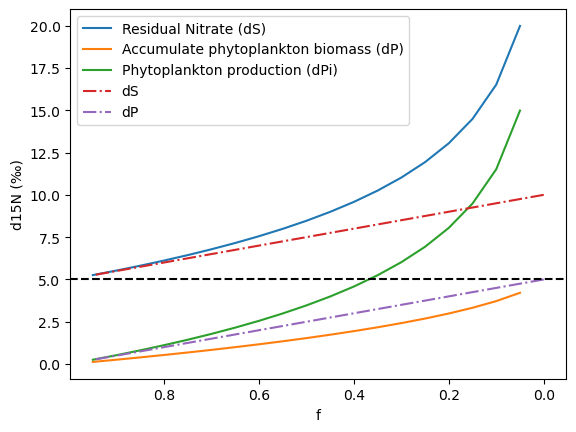

In [7]:
# Open system
def steady_state(f,ds0,eps):
    dsdf = ds0 -(1-f)*eps
    dpdf = ds0 + f*eps
    out = np.array([dsdf,dpdf])
    return out
steady = steady_state(f,ds0,eps)
plt.plot(f,out[0],label='Residual Nitrate (dS)')
plt.plot(f,out[1],label='Accumulate phytoplankton biomass (dP)')
plt.plot(f,out[2],label='Phytoplankton production (dPi)')
plt.plot(f,steady[0],label='dS',linestyle='-.')
plt.plot(f,steady[1],label='dP',linestyle='-.')
plt.axhline(y = ds0, color = 'black', linestyle = '--')
plt.gca().invert_xaxis()
plt.legend()
plt.ylabel('d15N (‰)')
plt.xlabel('f')
plt.show()


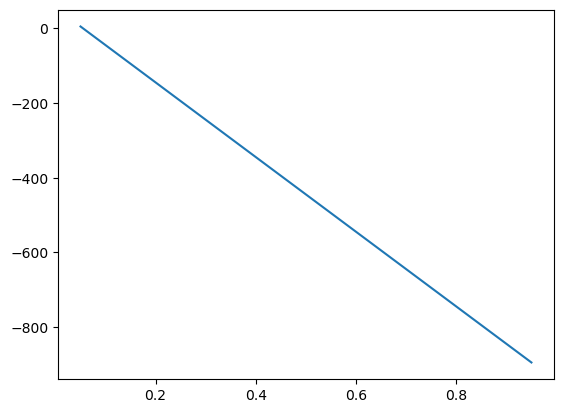

In [24]:
# EF
f = np.arange(0.05,1,0.05)
df = 0.5
ds = np.zeros(len(f))
ds[0]=ds0
for i in range(len(f)-1):
    dsdf = tendency(f[0],ds[i],eps)
    ds[i+1] = ds[i] + dsdf*df

plt.plot(f,ds)